# Q-Learning with ANN 🤖 🎛 ☎️ 
> This is a demo of Q-learning for solving Reinforcement Learning (RL) problems. The challenge here is a frozen lake that is being solved via **Artificial Neural Network (ANN)** approach for Q-learning implementation. It serves as an example code for an [introduction story into RL on Medium](https://towardsdatascience.com/lite-intro-into-reinforcement-learning-857ca5c924d9).

<img src="img/ann-wall-e.png" alt="Drawing" style="width: 400px;"/>

## 1) Environment 🗺
It is a [frozen lake by Gym OpenAI](https://gym.openai.com/envs/FrozenLake-v0/), in which an agent tries to find a safe path across a grid of slippery ice and water tiles to get the ultimate reward.

In [ ]:
'''
.--------------------.
| 🐹 | ❄️ | ❄️ | ❄️ | 
|- - - - -  - - - - -|
| ❄️ | 🕳 | ❄️ | 🕳 |
|- - - - -  - - - - -|
| ❄️ | ❄️ | ❄️ | 🕳 |
|- - - - -  - - - - -|
| 🕳 | ❄️ | ❄️ | 🥜 |
.--------------------.
'''

The environment is depicted in the picture above as a 4x4 grid world with 16 possible states. There is a hamster that tries to munch on peanuts. Its **goal is to reach those peanuts**!
* this little fellow can choose to go one of **4 directions (actions) on the ice at each grid cell (state)**, i.e. it can go either up, down, left, or right
* it tries to **avoid going into water holes**, which results in sinking and therefore an unsuccessful attempt
* however, it is not that easy since there is a chance that this little creature can **randomly slip on ice and go into different grid cells** than wanted
* the **success or failure** for solving the frozen lake is defined by this hamster getting those peanuts or sinking into the water hole, respectively

## 2) Algorithm 🎰
It is a classic Q-learning algorithm that goes through iteration steps to experience the environment. After certain amount of episodes, it ultimately finds the best state-action pairs Q(s,a) for the algorithm, the so called "Q-values". The Q-values represent how good it is for an agent (🐹) to be in state in terms of getting the long term reward (🥜). This algorithm has various implementations depending on which policy is chosen for taking actions or how Q-values are processed. The picture below shows an overview on the implementation of this model-free algorithm from the Temporal Difference learning (TD) method [Sutton & Barto 2017].

![title](img/algo-method.png)
> _... let's see the implementation!_ 🛠

### ANN ☎️
We will **create and train a simple ANN-like model** that will serve us as a universal function approximator resembling optimal Q-values for the Q-learning algorithm. The Q-values are represented here via a weights matrix. This matrix is initialized with some values at start and gets populated / trained with different values as the algorithm proceeds. It ultimately reaches some optimal values for an agent to choose (higher Q-values are better), once it has learned how to solve the environment. This means that Q-values are learned after a certain amount of episodes (training steps/iterations) & can be then used to play the game (solve the environment) better than without any prior training.

This neural net is hopefully as simple as possible, since it is fed forward only into a single layer of output nodes and has a simple optimizer for training. It is loosely shown in the picture below and has the following properties.
* **16 neurons in the input layer** are representing all possible states (s) -> a [1,16] shaped matrix
* a **weights matrix** is representing Q-values, where its **4 columns** are representing possible actions (U for up, D for down, L for left, R for right) & its **16 rows** representing all states for this environment -> a [16,4] shaped matrix
* **4 neurons in the output layer** are representing values for possible actions (a) in the particular state (s), i.e. Q-values for that state -> a [1,4] shaped matrix

In [ ]:
'''
  input        weights         output
 (states)     (Q-values)       (Q-values for actions in that particular state)  
  
             U   D   L   R
           .---------------.
0    o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
1    o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
2    o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
3    o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
4    o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
5    o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
6    o-   -| Q | Q | Q | Q |-   -o U
           | - - - - - - - |
7    o-   -| Q | Q | Q | Q |-   -o D
           | - - - - - - - |
8    o-   -| Q | Q | Q | Q |-   -o L
           | - - - - - - - |
9    o-   -| Q | Q | Q | Q |-   -o R
           | - - - - - - - |
10   o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
11   o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
12   o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
13   o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
14   o-   -| Q | Q | Q | Q |- 
           | - - - - - - - |
15   o-   -| Q | Q | Q | Q |- 
           .---------------.
'''

The **feed-forward process** for **obtaining Q-values for a given state** from this neural net works as following:
* input layer receives an information about which state is being evaluated in the environment,
* then a particular neuron of the input layer belonging to that particular state fires,
* information travels to output layer while grabbing Q-values for that state from weights matrix,
* and this results into output layer receiving Q-values for actions in that particular state.

#### approximating 📐
The Q-learning tells us through Q-values what reward is there for taking an action in a state of the environment. Our neural net will try to resemble Q-values by approximating them. It will be designed to arrive at some optimal Q-values by first using an 'update rule' that estimates new Q-values and then by using a loss function, which expresses an error brought on by such estimation. We will then use such error to update the Q-values through some optimization technique during training (shown in the next section). These procedures will be performed for the each training step.

<img src="img/algo-update_rule.png" alt="Drawing" align="left" style="width: 350px;"/>

The equation above shows our 'update rule' that is based on Bellman equations. It is used in the TD method, where the right-hand side of equation is usually called a TD target. It describes the update of the new Q-value. In this equation, such value is obtained through scaling the maximum Q-value for the new state (sʹ) through discount factor (ɣ) and then adding a reward (R) to it. Also, the difference between both sides of this equation is known as TD error. This is the error which we are trying to capture with our loss function.

<img src="img/algo-loss_l2.png" alt="Drawing" align="left" style="width: 250px;"/>

We will also use a simple L2 Euclidean norm to represent an error brought on by this approximation of Q-values (the introduced update rule). The L2-norm assigns a possitive length to the vector describing such error. As shown in the equation above, this vector norm is implemented same as the least squares method in regression analysis which minimizes the sum of the square of the differences between dependent (y) and independent (x) variables at each step (i).
* we will use the **TD target as our update rule for Q-values**
* we will use the basic **L2-norm (least squares) as our loss function**

#### optimizing ⛳️
A training of ANNs requires optimization techniques to minimize a cost, e.g. to minimize some loss brought on by a function approximation. Here, we need to minimize an error from estimating Q-values so that we can get closer to final (more optimal) Q-values as we train. Therefore, we will choose an optimization procedure that will help us minimize such error by somehow updating ANN weights (Q-values) at each iteration (training step). 

<img src="img/algo-bgd.png" alt="Drawing" align="left" style="width: 210px;"/>

Such optimization procedure can be done with the Batch Gradient Descent (BGD) algorithm shown with the equation above. It minimizes our loss by iteratively moving in the direction of steepest descent, which is the negative of the gradient that is calculated from the loss function. In detail, it updates our ANN weights (𝜃) with gradients (𝛻) of the loss function (J) at its own rate of learning (𝜂).
* we will use the simple **BGD as an optimization algorithm that minimizes our loss**

### Bandit 🔫 🤠 🐴
We will create an agent that **chooses actions** as if it were a **multiarmed bandit**. It is a famous problem from probability theory, that was used to address decisions of gamblers playing slot machines in casinos. Here, it can help us to address here the exploration-exploitation dilemma in RL. This bandit will choose actions from supplied Q-values for a given state.
* the bandit will have **4 arms**, since we have 4 actions to choose at each state
* we will use the **epsilon-greedy** strategy for the bandit, i.e. our agent will randomly choose actions by flipping a coin so as to either go explore or exploit the environment
* the **epsilon can take values between 0 to 1**, where 0 means an agent will do no exploration whatsoever (100% exploitation) and 1 is all about exploration (0% exploitation)

## 3) Code 💻
We will **train** the Q-learning for certain amount of episodes in the environment and then try to **play** the game with learned Q-values by training.

### training 🏋️‍ 
> _... let's train the algorithm to solve the environment_

_... load the Python **packages**_

In [1]:
import gym
import mxnet as mx
import matplotlib.pyplot as plt
import random
from time import time

_... set the **hyperparameters** for the model_

In [2]:
EPISODES = 2000
STEPS = 100
BANDIT_ARMS = 4
BANDIT_TRAINING = True
EPSILON = 1 # setting the agent for exploration only -> try to learn the environment
LEARNING_RATE = 0.2 # the learning rate for our optimization algorithm
GAMMA = 0.95

_... load the test environment of **frozen lake**_ and get its possible number of _**states and actions**_

In [3]:
env = gym.make('FrozenLake-v0')
states = env.observation_space.n
actions = env.action_space.n

_... build the **ANN** that can select actions based on the particular state from Q-values_

In [4]:
# Input Layer
# -> create neurons for the input layer representing states of environemnt
input_layer = mx.sym.Variable(name='ann_states', shape=(1, states), dtype='float32')

# Weights Matrix
# -> create a matrix with weights representing Q-values in every state of environment
weights = mx.sym.Variable(name='ann_Q_values', shape=(states, actions), dtype='float32')

# Output Layer
# -> create neurons for the output layer representing Q-values in a particular state
output_layer = mx.sym.dot(name='ann_Q_values_state', lhs=input_layer, rhs=weights)

_... define the **training of ANN** to update Q-values by the agent's experience from an environment_

In [5]:
def train_ann(output_weights, label_weights, learning_rate):
    # compute gradients of the loss function by differentiating a graph of NDArray operations with the chain rule
    # -> define parameters of loss function for the following automatic differentiation
    loss_params = mx.nd.broadcast_sub(lhs=label_weights, rhs=output_weights)
    # -> attach gradient buffers to variables that require gradient
    loss_params.attach_grad()
    # -> wrap operations that need to be differentiated into a graph
    with mx.autograd.record():
        # add an operation for the loss function (L2)
        diff_opp = mx.nd.sum(data=mx.nd.square(data=loss_params))
    # -> calculate the gradients of wrapped operations with respect to their parameters
    diff_opp.backward()
    # -> get the gradients of the loss function
    loss_gradients = loss_params.grad
    
    # update the ANN label weights via the Batch Gradient Descent (BGD) optimization algorithm
    updated_weights = label_weights - learning_rate * loss_gradients
    return updated_weights

_... define the **epsilon-greedy bandit**_

In [6]:
def run_epsilon_greedy_bandit(arm_rewards, arms, training, epsilon, episode):
    # check if bandit is used for training
    if training:        
        # -> start with the full exploration and slowly reduce it as this algorithm learns
        epsilon = mx.nd.exp(data=mx.nd.array([-0.01 * episode]))

    # flip the coin (randomly select the number between 0 to 1)
    random_number = random.random()

    # select the arm
    if random_number > epsilon:
        # Exploit
        # -> find arms with highest rewards
        max_reward_arms = [i for i, e in enumerate(arm_rewards) if e == max(arm_rewards)]
        # -> select the best arm
        if len(max_reward_arms) == 1:
            # get the best arm
            arm = max_reward_arms[0]
        else:
            # randomly choose an arm from the best arms
            arm = random.choice(max_reward_arms)
    else:
        # Explore
        # -> randomly choose an arm
        arm = random.randrange(arms)
        
    return arm

_... run the **Q-learning** for the test environment_

In [7]:
# log the training start
training_start = time()

# store the training progress of this algorithm for each episode
episode_rewards = []
episode_steps = []

# prepare the model & initialize all trainable variables before the training starts
# -> prepare a matrix for slicing states in the input layer 
input_layer_init = mx.nd.one_hot(mx.nd.arange(16), 16)
# -> manually initilize weights (Q-values) with random values close to zero
weights_init = mx.nd.random_uniform(low=0, high=0.01, shape=(states, actions), dtype='float32')
ex = weights.eval(ctx = mx.cpu(), ann_Q_values=weights_init)
Q = ex[0]

# solve the environment over certain amount of episodes
for episode in range(EPISODES):
    # reset the environment, rewards, and steps for the new episode
    s = env.reset()
    episode_reward = 0
    step = 0

    # find the solution over certain amount of attempts (steps in each episode)
    while step < STEPS:
        # get Q-values for the current state by feeding it forward through the ANN
        ex = output_layer.eval(ctx = mx.cpu(), ann_states=input_layer_init[s:s+1], ann_Q_values=Q)
        Q_current = ex[0][0]

        # select the action in the current state by running the multiarmed bandit
        a = run_epsilon_greedy_bandit(Q_current, BANDIT_ARMS, BANDIT_TRAINING, EPSILON, episode)

        # enter the environment and get the experience from it by performing there an action
        # -> get observation (new state), reward, done (success/failure), and information
        observation, reward, done, info = env.step(a)

        # get Q-values for the observed state by feeding it through the ANN 
        ex = output_layer.eval(ctx = mx.cpu(), ann_states=input_layer_init[observation:observation+1], ann_Q_values=Q)
        Q_observed = ex[0][0]

        # estimate the Q-value for the current state and action
        # -> calculate this Q-value with the update rule using the experience from the environment
        Q_target = Q_current.copy()
        Q_target[a] = reward + GAMMA * mx.nd.max(Q_observed)

        # train the ANN to minimize the estimation error by optimizing the Q-values
        Q_optimized = train_ann(Q_target, Q_current, LEARNING_RATE)

        # manually update the weights matrix with the trained Q-values for this state
        Q[s] = Q_optimized

        # add the reward to others during this episode
        episode_reward += reward

        # change the state to the observed state for the next iteration
        s = observation

        # check if the environment has been exited
        if done:
            # -> store the collected rewards & number of steps in this episode     
            episode_rewards.append(episode_reward)
            episode_steps.append(step)
            # -> quit the episode
            break

        # continue looping
        step += 1
        
# log the training end
training_end = time()

_... print the **final Q-values**_

In [8]:
print("trained Q-values", Q)

trained Q-values 
[[2.8013042e-01 5.4570407e-02 5.5241983e-02 4.9649999e-02]
 [3.1737499e-02 2.6919952e-02 2.5589464e-02 1.2394760e-01]
 [2.6027806e-02 1.5027592e-01 2.5456756e-02 6.2077455e-03]
 [6.1860220e-03 6.0624462e-03 6.1661690e-03 7.7241011e-02]
 [3.4997883e-01 5.5685084e-02 5.6258541e-02 5.0328936e-02]
 [7.9172505e-03 8.1216870e-03 5.2889488e-03 4.7997716e-03]
 [1.2393734e-02 6.5235347e-03 7.9866067e-02 6.8170745e-03]
 [7.1036053e-04 3.3739617e-03 8.7129296e-04 6.4817187e-03]
 [7.5226203e-02 5.6825291e-02 7.5761192e-02 3.9562440e-01]
 [7.0436731e-02 4.4835547e-01 9.1762230e-02 6.4397097e-02]
 [4.1470245e-01 7.8365982e-02 5.8944914e-02 6.0961675e-02]
 [4.6147937e-03 5.2047744e-03 7.8052920e-03 6.7887953e-03]
 [1.1827442e-03 7.2063264e-03 6.3992101e-03 5.8201980e-03]
 [1.9785972e-01 8.5507564e-02 5.6842494e-01 1.7368481e-01]
 [2.7566043e-01 8.2913661e-01 2.7510583e-01 2.6792383e-01]
 [2.6455559e-03 1.8633234e-03 7.7423370e-03 7.3691811e-03]]
<NDArray 16x4 @cpu(0)>


_... print the **training progress** of the algorithm_


This environment has been solved 55.35 % of times over 2000 episodes within 157 seconds!


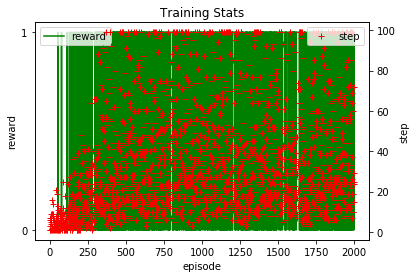

In [9]:
# show the success rate for solving the environment & elapsed training time
success_rate = round((sum(episode_rewards) / EPISODES) * 100, 2)
elapsed_training_time = int(training_end - training_start)
print("\nThis environment has been solved", str(success_rate), "% of times over",  str(EPISODES), "episodes within", str(elapsed_training_time), "seconds!")

# plot the rewards and number of steps over all training episodes
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(episode_rewards, '-g', label = 'reward')
ax1.set_yticks([0,1])
ax2 = ax1.twinx()
ax2.plot(episode_steps, '+r', label = 'step')
ax1.set_xlabel("episode")
ax1.set_ylabel("reward")
ax2.set_ylabel("step")
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.title("Training Stats")
plt.show()

>_... the training progress of this algorithm can be seen from the figure above, where each episode finishes either with value 0 or 1 as a reward -> this means that our agent 🐹 fell into the ice hole 🕳 or found those peanuts 🥜, respectively_
> * the **algorithm is able to solve the environment more often as it learns** and starts exploiting its own knowledge more with increasing episodes
> * with increasing episodes, **our agent also survives longer in the environment** without falling into the ice hole and eventually reaches the reward... how efficiently it reaches the goal is questionable though, since the ice is slippery and not being dead under it is probably important too :)

### playing 🎮
> _... let's play the game to see how our agent 🐹 solves the environment with the knowledge obtained from training, i.e. with the trained Q-values_

_... set the **hyperparameters for the game**_

In [10]:
GAME_EPISODES = 10
BANDIT_TRAINING = False
EPSILON = 0 # setting the agent for pure exploitation -> use only learned Q values from training

_... let's **play the game**_

In [14]:
for episode in range(GAME_EPISODES):
    s = env.reset()
    step = 0
    while step < STEPS:
        # take the action that have the maximum expected future reward
        a = run_epsilon_greedy_bandit(Q[s, :], BANDIT_ARMS, BANDIT_TRAINING, EPSILON, episode)
        
        # enter the environment and get the experience from it
        observation, reward, done, info = env.step(a)

        # change the state to observed state for the next iteration
        s = observation

        # check if the environment has been exited
        if done:
            # print stats of this game
            print("\n-----------------------------")
            print(step, "steps in episode", episode)
            print("The last action & state was:")
            env.render()
            print("-----------------------------")
            # quit the episode
            break

        # continue looping
        step += 1


-----------------------------
77 steps in episode 0
The last action & state was:
  (Down)
SFFF
FHFH
FFFH
HFFG
-----------------------------

-----------------------------
38 steps in episode 1
The last action & state was:
  (Down)
SFFF
FHFH
FFFH
HFFG
-----------------------------

-----------------------------
27 steps in episode 2
The last action & state was:
  (Down)
SFFF
FHFH
FFFH
HFFG
-----------------------------

-----------------------------
38 steps in episode 3
The last action & state was:
  (Down)
SFFF
FHFH
FFFH
HFFG
-----------------------------

-----------------------------
66 steps in episode 4
The last action & state was:
  (Down)
SFFF
FHFH
FFFH
HFFG
-----------------------------

-----------------------------
24 steps in episode 5
The last action & state was:
  (Right)
SFFF
FHFH
FFFH
HFFG
-----------------------------

-----------------------------
7 steps in episode 6
The last action & state was:
  (Down)
SFFF
FHFH
FFFH
HFFG
-----------------------------

------------

<img src="img/conclusions-wall-e.png" alt="Drawing" style="width: 500px;"/>

## Conclusions 🤔
We have built a simple neural net model for Q-learning solving an RL problem of a frozen lake. As seen from running the code, our model learns during training and then takes advantage of such prior experience when solving the environment during playing. We have used a low learning rate for the optimization algorithm in order for our solution to be more precise, since we do not care much about the time it will cost us due to simplicity of this model. Also, here we have perhaps used an overly simple loss function that is not robust enough to deal with noisy Q estimates. However, you can tweak the hyperparameters for discount factor, choose different loss functions, or even implement different bandit strategies for choosing actions to see if it learns better during training.

## References
* R. S. Sutton and A. G. Barto: "Reinforcement Learning: An Introduction", 2nd edition, A Bradford Book, 2017